No existing library file found. Creating a new one.
Sample library data created.

Library Management Menu:
1. View Books
2. Add a Book
3. Remove a Book
4. Lend a Book
5. Return a Book
6. Visualize Data
7. Calculate Statistics
8. Search Books
9. Overdue Books
10. Export Library Data
11. Exit
Enter your choice (1-11): 6
Generating data visualizations...


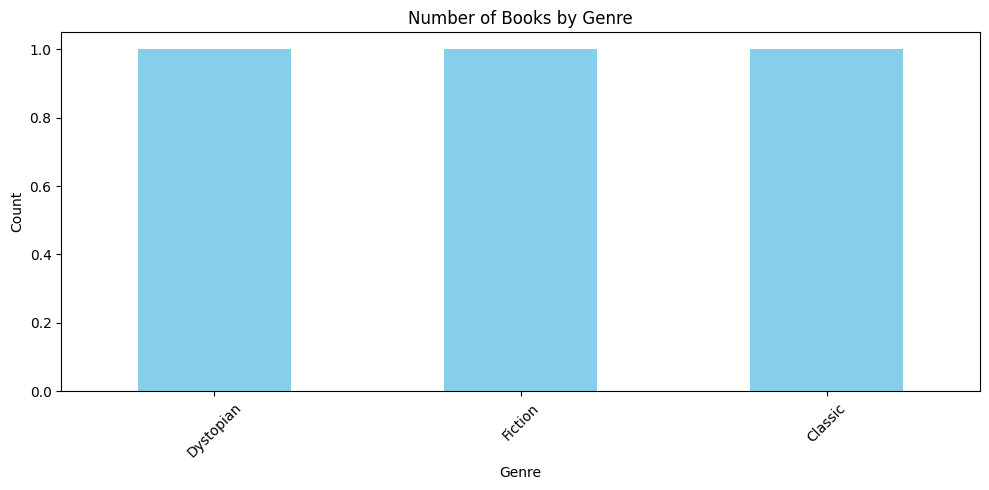

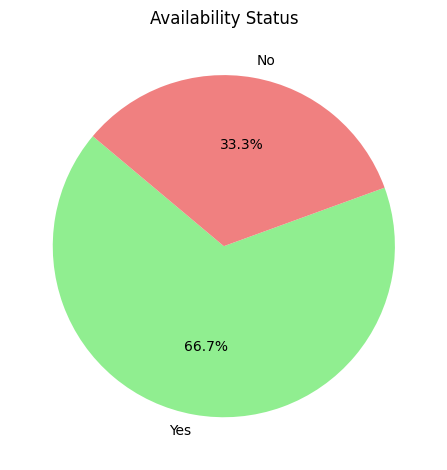


Library Management Menu:
1. View Books
2. Add a Book
3. Remove a Book
4. Lend a Book
5. Return a Book
6. Visualize Data
7. Calculate Statistics
8. Search Books
9. Overdue Books
10. Export Library Data
11. Exit
Enter your choice (1-11): 7
Calculating library statistics...
Total number of books: 3
Most borrowed genre: Classic
Average borrowing duration: 15.00 days

Library Management Menu:
1. View Books
2. Add a Book
3. Remove a Book
4. Lend a Book
5. Return a Book
6. Visualize Data
7. Calculate Statistics
8. Search Books
9. Overdue Books
10. Export Library Data
11. Exit
Enter your choice (1-11): 10


In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import re
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Initialize or load library inventory (check for existing file)
def initialize_library():
    try:
        data = pd.read_csv("library_inventory.csv")
        print("Library data loaded successfully.")
    except FileNotFoundError:
        print("No existing library file found. Creating a new one.")
        sample_data = {
            "Book ID": ["BK-001", "BK-002", "BK-003"],
            "Title": ["1984", "To Kill a Mockingbird", "The Great Gatsby"],
            "Author": ["George Orwell", "Harper Lee", "F. Scott Fitzgerald"],
            "Genre": ["Dystopian", "Fiction", "Classic"],
            "Availability": ["Yes", "Yes", "No"],
            "Borrower": [None, None, "John Doe"],
            "Borrow Duration (days)": [0, 0, 15],
            "Borrow Date": [None, None, "2024-11-27"]  # Borrow Date field
        }
        data = pd.DataFrame(sample_data)
        data.to_csv("library_inventory.csv", index=False)
        print("Sample library data created.")
    return data

library_data = initialize_library()

def save_library():
    """Save the current library data to a CSV file."""
    library_data.to_csv("library_inventory.csv", index=False)
    print("Library data saved successfully.")

def display_books():
    """Display all books in the library in a tabular format."""
    print("\nLibrary Inventory:")
    print(tabulate(library_data, headers='keys', tablefmt='grid', showindex=False))

def is_valid_book_id(book_id):
    """Check if the book ID follows the format BK-XXX."""
    return re.fullmatch(r"BK-\d{3}", book_id) is not None

def add_new_book():
    """Add a new book to the library inventory."""
    global library_data
    book_id = input("Enter Book ID (e.g., BK-001): ")
    if not is_valid_book_id(book_id):
        print("Invalid Book ID format. Please use 'BK-XXX'.")
        return
    title = input("Book Title: ")
    author = input("Author Name: ")
    genre = input("Genre: ")
    availability = input("Available? (Yes/No): ")
    new_entry = {
        "Book ID": book_id,
        "Title": title,
        "Author": author,
        "Genre": genre,
        "Availability": availability,
        "Borrower": None,
        "Borrow Duration (days)": 0,
        "Borrow Date": None
    }
    library_data = pd.concat([library_data, pd.DataFrame([new_entry])], ignore_index=True)
    save_library()
    print(f"Book '{title}' added successfully.")

def remove_book():
    """Remove a book from the library using its ID."""
    global library_data
    book_id = input("Enter Book ID to remove: ")
    if not is_valid_book_id(book_id):
        print("Invalid Book ID format.")
        return
    if book_id in library_data["Book ID"].values:
        library_data = library_data[library_data["Book ID"] != book_id]
        save_library()
        print(f"Book with ID {book_id} removed.")
    else:
        print(f"No book found with ID {book_id}.")

def lend_book():
    """Lend a book to a borrower."""
    global library_data
    book_id = input("Enter Book ID to lend: ")
    if not is_valid_book_id(book_id):
        print("Invalid Book ID format.")
        return
    if book_id in library_data["Book ID"].values:
        book = library_data[library_data["Book ID"] == book_id]
        if book["Availability"].values[0] == "Yes":
            borrower = input("Borrower's Name: ")
            duration = int(input("Borrow Duration (in days): "))
            borrow_date = datetime.today().strftime('%Y-%m-%d')
            library_data.loc[library_data["Book ID"] == book_id, "Availability"] = "No"
            library_data.loc[library_data["Book ID"] == book_id, "Borrower"] = borrower
            library_data.loc[library_data["Book ID"] == book_id, "Borrow Duration (days)"] = duration
            library_data.loc[library_data["Book ID"] == book_id, "Borrow Date"] = borrow_date
            save_library()
            print(f"Book {book_id} lent to {borrower}.")
        else:
            print(f"Book {book_id} is currently unavailable.")
    else:
        print(f"No book found with ID {book_id}.")

def return_book():
    """Mark a book as returned."""
    global library_data
    book_id = input("Enter Book ID to return: ")
    if not is_valid_book_id(book_id):
        print("Invalid Book ID format.")
        return
    if book_id in library_data["Book ID"].values:
        book = library_data[library_data["Book ID"] == book_id]
        if book["Borrower"].values[0]:
            library_data.loc[library_data["Book ID"] == book_id, "Availability"] = "Yes"
            library_data.loc[library_data["Book ID"] == book_id, "Borrower"] = None
            library_data.loc[library_data["Book ID"] == book_id, "Borrow Duration (days)"] = 0
            library_data.loc[library_data["Book ID"] == book_id, "Borrow Date"] = None
            save_library()
            print(f"Book {book_id} returned successfully.")
        else:
            print(f"Book {book_id} was not lent out.")
    else:
        print(f"No book found with ID {book_id}.")

def visualize_data():
    """Generate bar chart and pie chart for library data."""
    print("Generating data visualizations...")

    # Bar chart for number of books by genre
    genre_counts = library_data['Genre'].value_counts()
    plt.figure(figsize=(10, 5))
    genre_counts.plot(kind='bar', color='skyblue')
    plt.title("Number of Books by Genre")
    plt.xlabel("Genre")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Pie chart for availability status
    availability_counts = library_data['Availability'].value_counts()
    availability_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=140)
    plt.title("Availability Status")
    plt.ylabel('')  # Hide the y-axis label
    plt.tight_layout()
    plt.show()

def calculate_statistics():
    """Calculate and display library statistics."""
    print("Calculating library statistics...")
    total_books = len(library_data)
    print(f"Total number of books: {total_books}")

    # Most borrowed genre
    borrowed_books = library_data[library_data['Availability'] == "No"]
    most_borrowed_genre = borrowed_books['Genre'].mode()[0] if not borrowed_books.empty else "None"
    print(f"Most borrowed genre: {most_borrowed_genre}")

    # Average borrowing duration
    average_duration = borrowed_books['Borrow Duration (days)'].mean() if not borrowed_books.empty else 0
    print(f"Average borrowing duration: {average_duration:.2f} days")

def search_books():
    """Search for books by title, author, or genre."""
    search_term = input("Enter search term (Title/Author/Genre): ").lower()
    search_results = library_data[library_data.apply(lambda row: row.astype(str).str.contains(search_term).any(), axis=1)]

    if not search_results.empty:
        print("\nSearch Results:")
        print(tabulate(search_results, headers='keys', tablefmt='grid', showindex=False))
        export_search = input("Would you like to export the search results to a CSV file? (Yes/No): ").strip().lower()
        if export_search == "yes":
            export_to_csv(search_results)
    else:
        print("No books found matching the search term.")

def overdue_books():
    """Check for overdue books."""
    today = datetime.today()
    overdue_books = library_data[
        (library_data['Availability'] == 'No') &
        (pd.to_datetime(library_data['Borrow Date'], errors='coerce') + pd.to_timedelta(library_data['Borrow Duration (days)'], unit='D') < today)
    ]

    if not overdue_books.empty:
        print("\nOverdue Books:")
        print(tabulate(overdue_books, headers='keys', tablefmt='grid', showindex=False))
        export_overdue = input("Would you like to export the overdue books to a CSV file? (Yes/No): ").strip().lower()
        if export_overdue == "yes":
            export_to_csv(overdue_books)
    else:
        print("No overdue books.")

def export_to_csv(data):
    """Export filtered or searched data to a new CSV file."""
    file_name = input("Enter the file name to export data: ")
    data.to_csv(f"{file_name}.csv", index=False)
    print(f"Data exported to {file_name}.csv")

def export_library_data():
    """Export the library data to a CSV file."""
    file_name = input("Enter the file name to export data: ")
    library_data.to_csv(f"{file_name}.csv", index=False)
    print(f"Library data exported to {file_name}.csv")

def main_menu():
    """Display the main menu and handle user input."""
    while True:
        print("\nLibrary Management Menu:")
        print("1. View Books")
        print("2. Add a Book")
        print("3. Remove a Book")
        print("4. Lend a Book")
        print("5. Return a Book")
        print("6. Visualize Data")
        print("7. Calculate Statistics")
        print("8. Search Books")
        print("9. Overdue Books")
        print("10. Export Library Data")
        print("11. Exit")

        choice = input("Enter your choice (1-11): ")
        if choice == "1":
            display_books()
        elif choice == "2":
            add_new_book()
        elif choice == "3":
            remove_book()
        elif choice == "4":
            lend_book()
        elif choice == "5":
            return_book()
        elif choice == "6":
            visualize_data()
        elif choice == "7":
            calculate_statistics()
        elif choice == "8":
            search_books()
        elif choice == "9":
            overdue_books()
        elif choice == "10":
            export_library_data()
        elif choice == "11":
            print("Exiting program.")
            break
        else:
            print("Invalid choice, please try again.")

if __name__ == "__main__":
    main_menu()
